In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import FuncFormatter

file_path = r"data/Fin_data.csv"

df = pd.read_csv(file_path)

#Displaying the first 5 rows of data 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
## Lets take a look at some dataframes     

In [8]:
#Value Counts for Is Fraud 
value_counts_Fraud = df['isFraud'].value_counts().to_frame()

value_counts_Fraud


,count
isFraud,
0,6354407
1,8213


In [9]:
#Value Counts for isFlaggedFraud
value_counts_isFlaggedFraud = df['isFlaggedFraud'].value_counts().to_frame()

value_counts_isFlaggedFraud


,count
isFlaggedFraud,
0,6362604
1,16


In [10]:
#This pulls all the data where the account was fraud
fraud = df[df["isFraud"] == 1] 
#Pulls the data where the accounts were not fraud
Notfraud = df[df["isFraud"] == 0]


IsFlaggedFraud_df = df[df["isFlaggedFraud"] == 1]
IsNotFlaggedFraud_df = df[df["isFlaggedFraud"] == 0]



In [11]:
#This database shows that only transfers and Cash outs have been Fraud
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [12]:
#This database showing what is not fraud 
Notfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [13]:
#This is shoiwng that only Transfers are being marked fraud 
IsFlaggedFraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [14]:
#There are accounts that are fraud even that they have not been marked for fraud 
IsNotFlaggedFraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


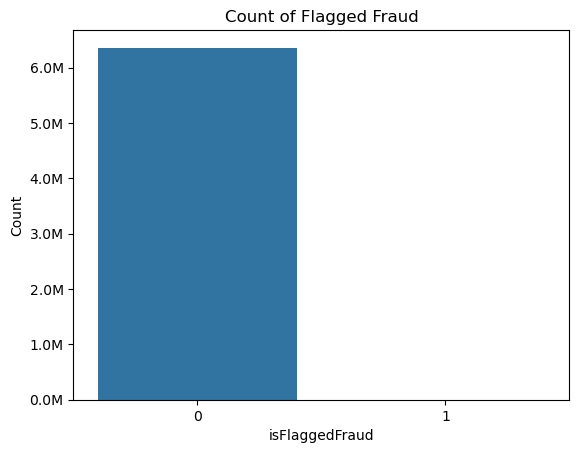

In [15]:

sns.countplot(data= df, x = "isFlaggedFraud" )
plt.ylabel('Count')
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')  # Formatting to show in millions (1M)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Count of Flagged Fraud')
plt.show()

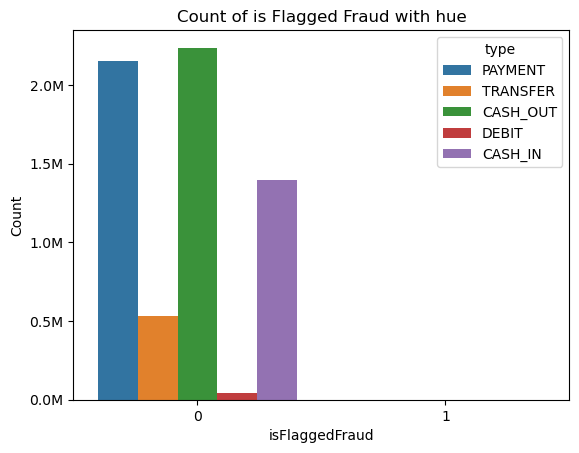

In [16]:

sns.countplot(data=df, x = "isFlaggedFraud", hue= "type")
plt.ylabel('Count')
plt.title('Count of is Flagged Fraud with hue')
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')  # Formatting to show in millions (1M)
plt.gca().yaxis.set_major_formatter(formatter)

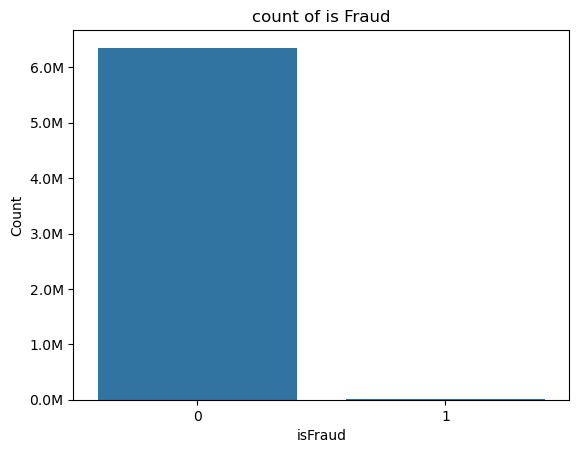

In [17]:
#Describing what is Fraud
sns.countplot(data= df, x = "isFraud" )
plt.ylabel('Count')
plt.title('count of is Fraud')
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')  # Formatting to show in millions (1M)
plt.gca().yaxis.set_major_formatter(formatter)

<Axes: title={'center': 'Count is Fraud with hue'}, xlabel='isFraud', ylabel='count'>

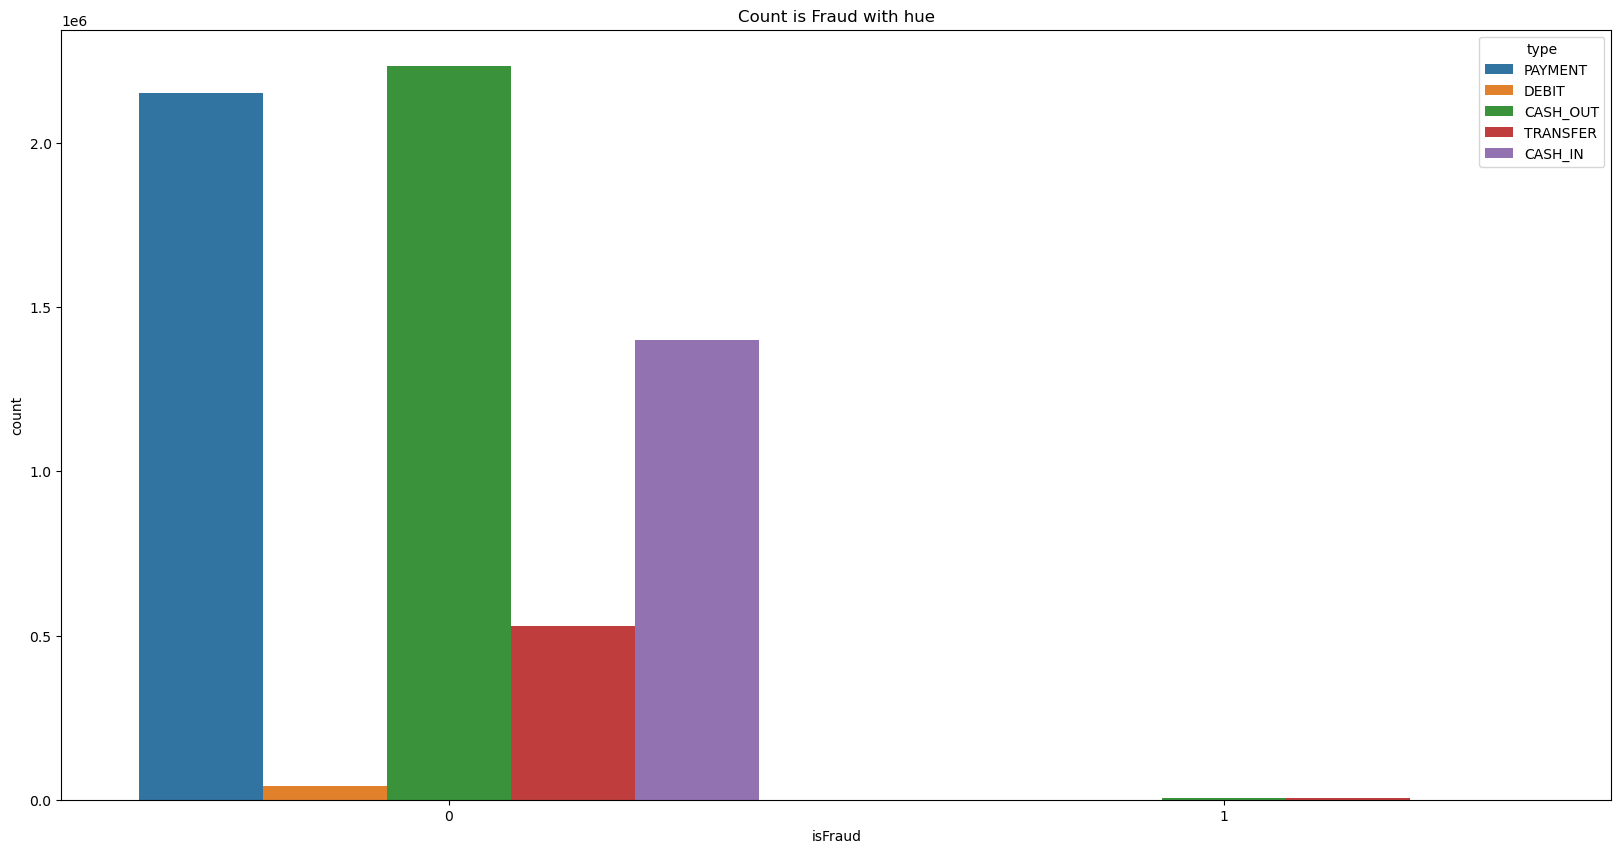

In [18]:
#For read me - only types that have been fraud in the total data set is tranfers and Cash outs 
#Now out of whats fraud which type are isfraud and not... the data is small but if you look closely ont transfer and cash out are
plt.figure(figsize=(20,10))
plt.title('Count is Fraud with hue')
sns.countplot(data= df, x= "isFraud" , hue = "type")

Text(0.5, 1.0, 'What types are fraud?')

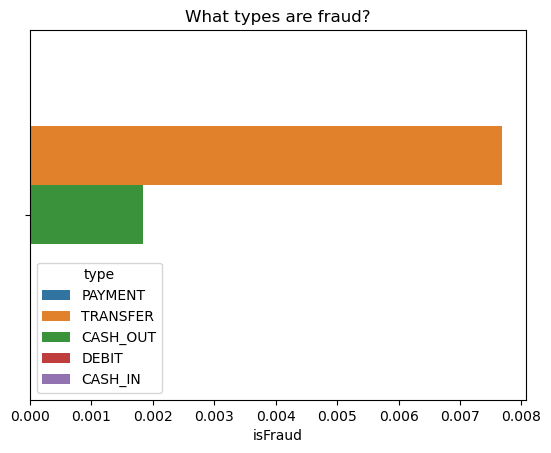

In [19]:
#A Closer looking showing the fraud types 
sns.barplot(data= df, x= "isFraud" , hue = "type", errorbar = None)
plt.title('What types are fraud?')

Text(0.5, 1.0, 'what types are flagged fraud?')

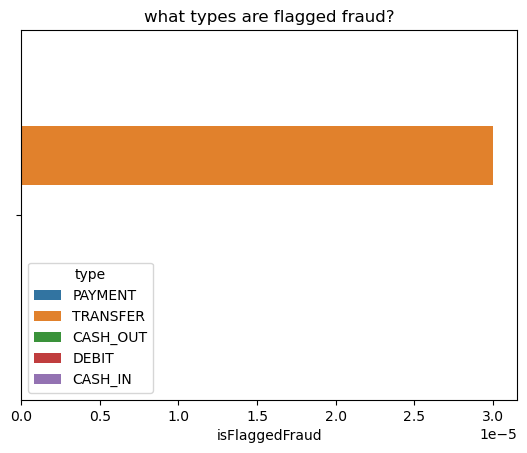

In [20]:
#For read me - We can see that only Transfer's only been flagged for Fraud 
sns.barplot(data= df, x= "isFlaggedFraud" , hue = "type", errorbar= None)
plt.title('what types are flagged fraud?')


Text(0.5, 1.0, 'Count of types')

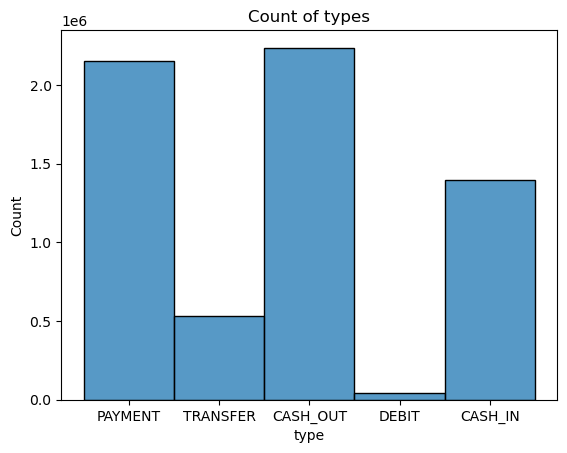

In [21]:
# Making a histogram of the quality variable.
#Payment and cash out have the highest amounts, which also happen to by the types where we see a lot of Fraud 
sns.histplot(data = df, x= 'type')
plt.title('Count of types')

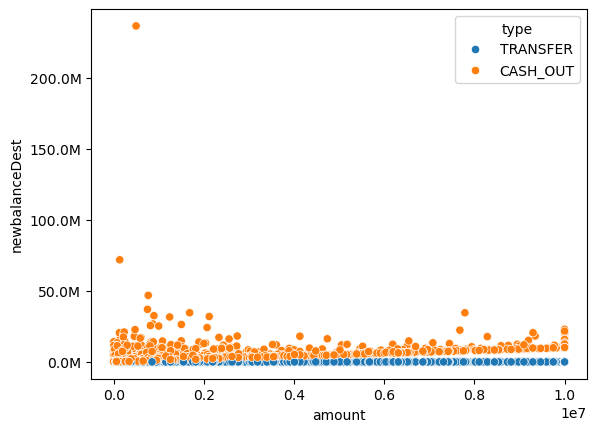

In [37]:
sns.scatterplot(data=fraud, x= "amount" , y= "newbalanceDest", hue = "type")
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')  # Formatting to show in millions (1M)
plt.gca().yaxis.set_major_formatter(formatter)

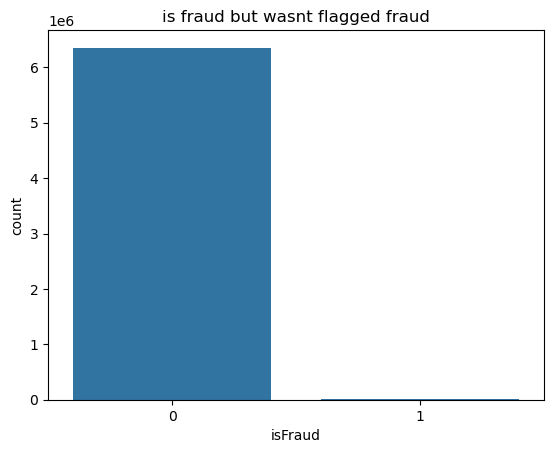

In [23]:
sns.countplot(data=IsNotFlaggedFraud_df, x="isFraud")
plt.title('is fraud but wasnt flagged fraud')
plt.show()

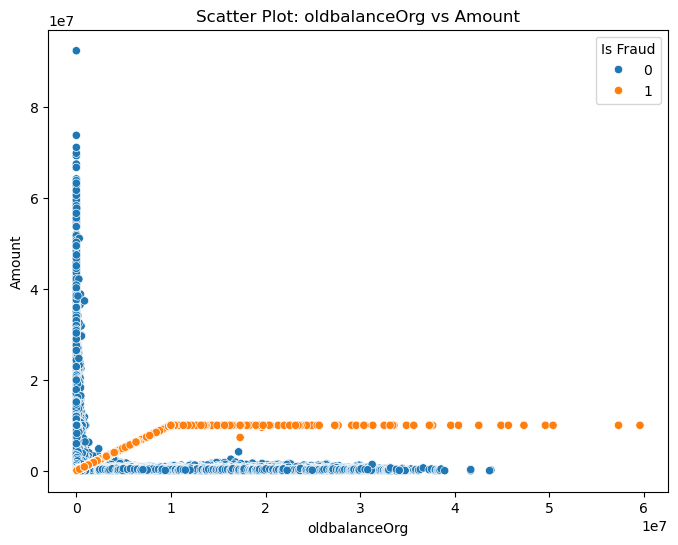

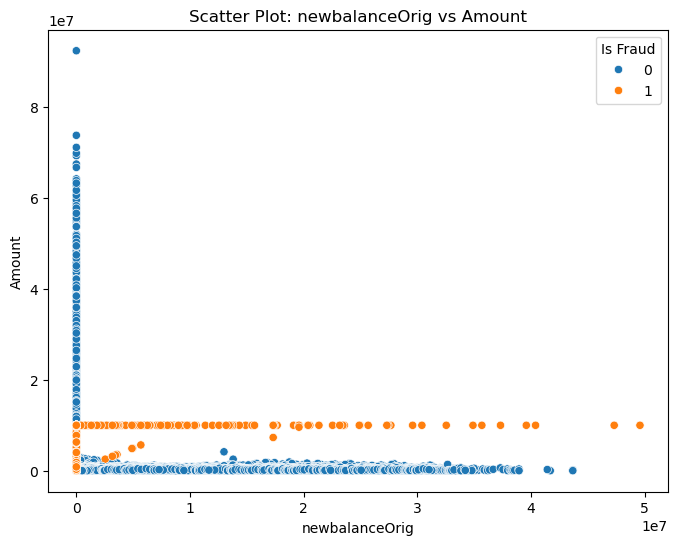

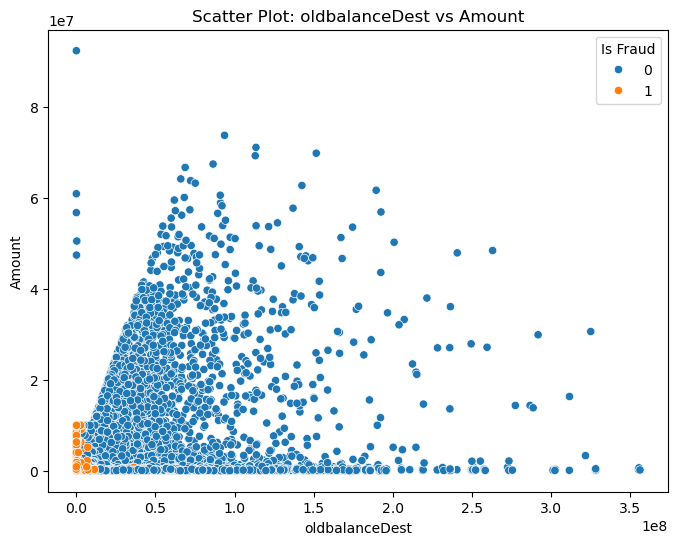

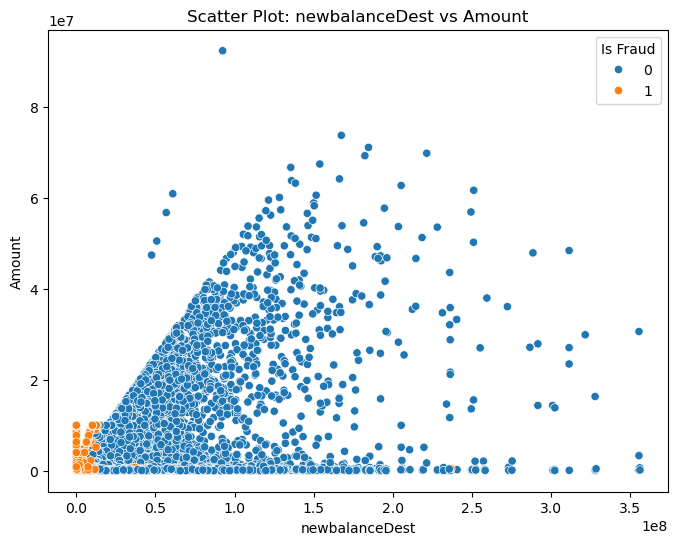

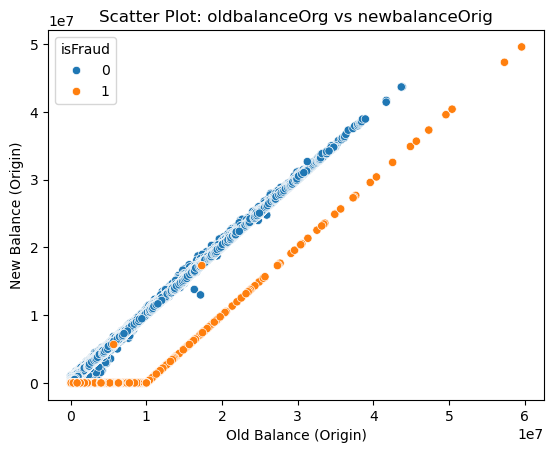

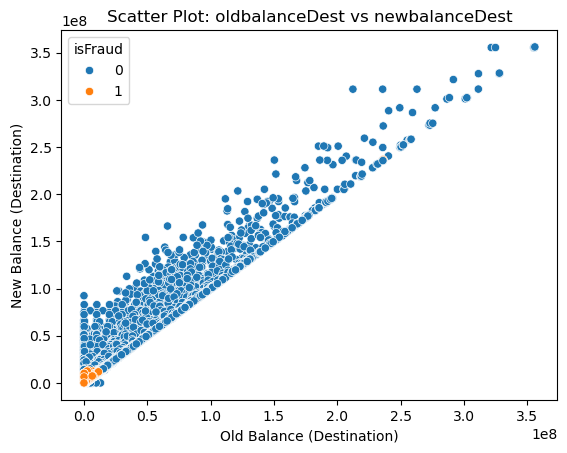

In [40]:


# List of features to plot
features = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Scatter plots for relationships between transaction amounts and balances
for feature in features:
    plt.figure(figsize=(8,6))
    
    # Scatter plot for 'amount' vs other features
    sns.scatterplot(data=df, x=feature, y='amount', hue='isFraud')
    
    plt.title(f'Scatter Plot: {feature} vs Amount')
    plt.xlabel(feature)
    plt.ylabel('Amount')
    plt.legend(title='Is Fraud', loc='best')
    plt.show()

# Scatter plots for balances and fraud flag
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', )
plt.title('Scatter Plot: oldbalanceOrg vs newbalanceOrig')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.show()

sns.scatterplot(data=df, x='oldbalanceDest', y='newbalanceDest', hue='isFraud')
plt.title('Scatter Plot: oldbalanceDest vs newbalanceDest')
plt.xlabel('Old Balance (Destination)')
plt.ylabel('New Balance (Destination)')
plt.show()


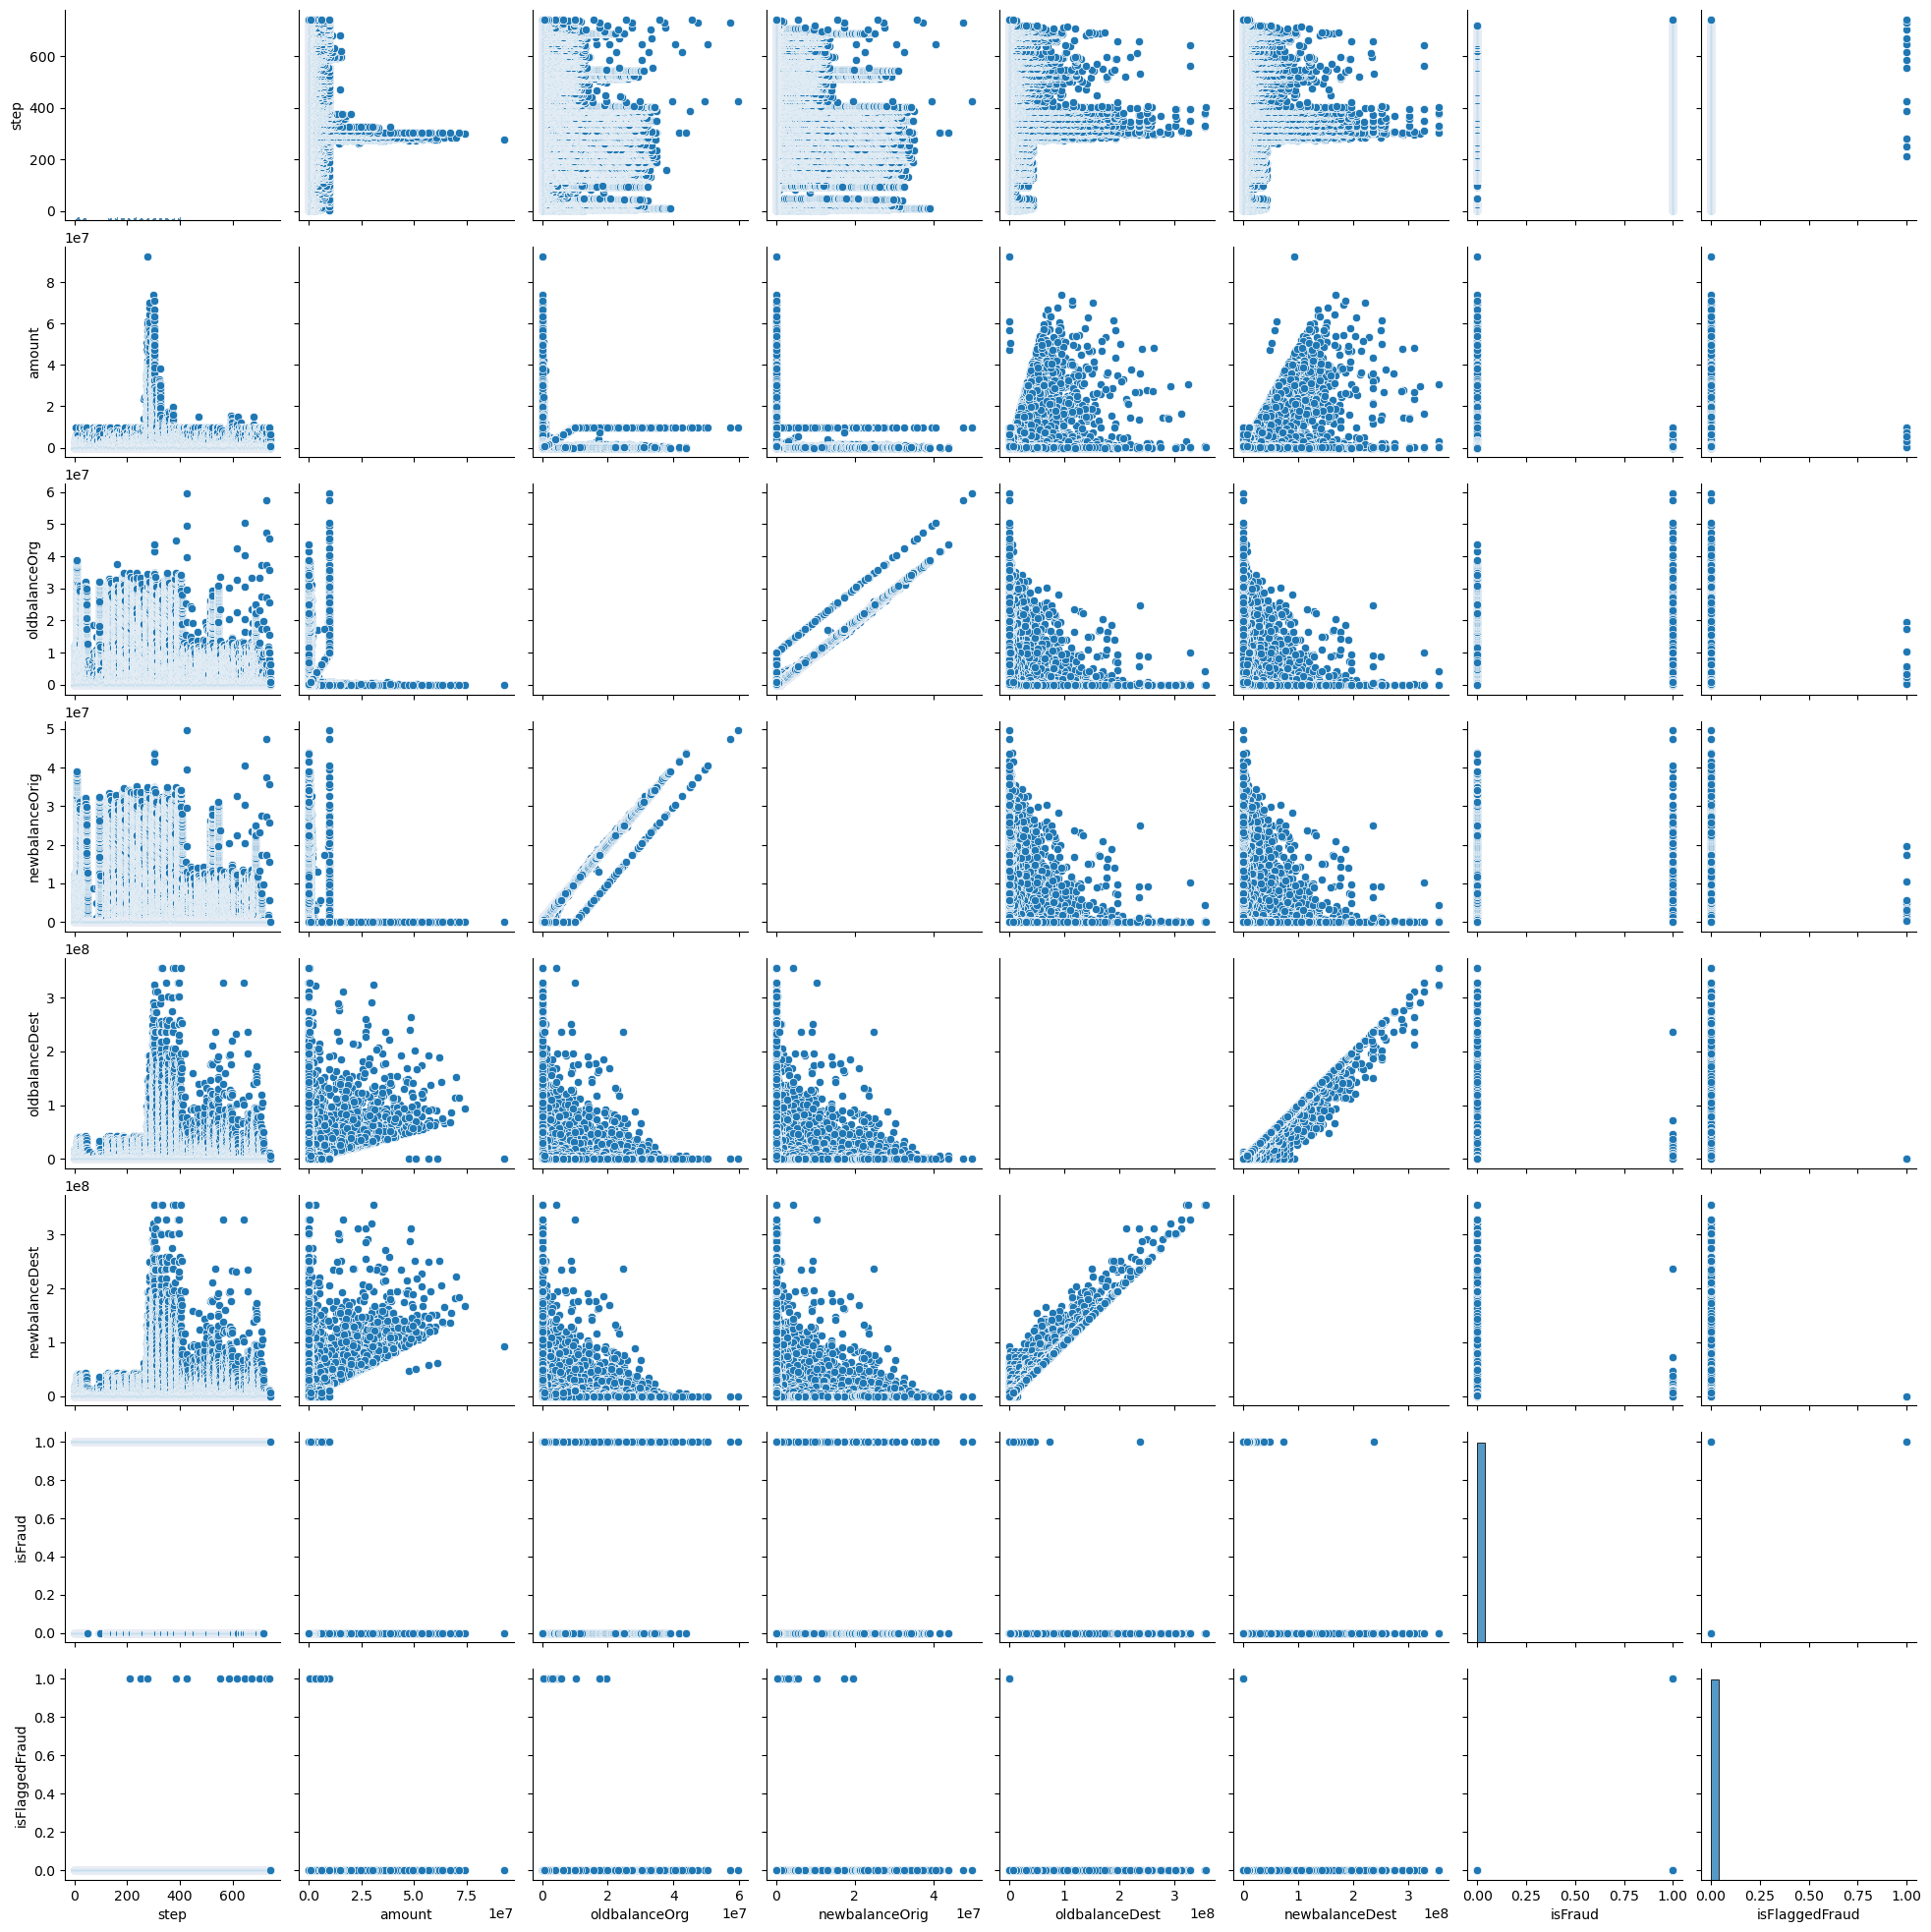

In [26]:
sns.pairplot(df)

In [24]:
#dropping the tables that are object types and running a correlation on the remaining columns  
df_numeric = df.drop(columns=['type','nameDest', 'nameOrig','step'])
df_numeric.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

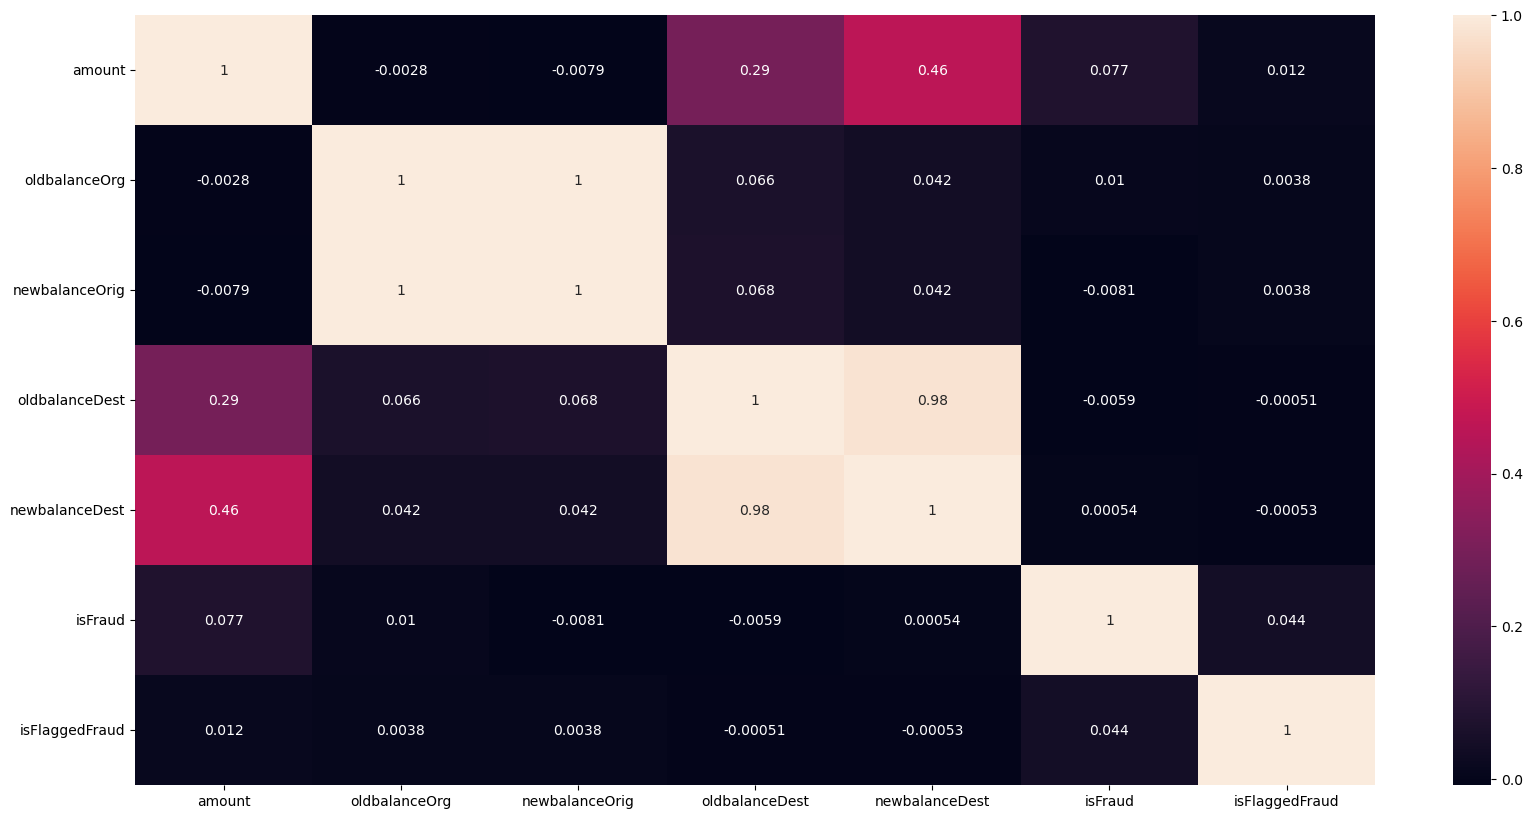

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.corr(), annot= True)

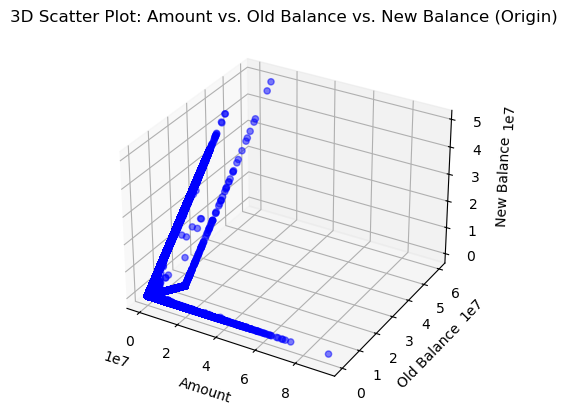

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for plotting
fig = plt.figure()

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using 'amount', 'oldbalanceOrg', and 'newbalanceOrig' columns
ax.scatter(df['amount'], df['oldbalanceOrg'], df['newbalanceOrig'], c='blue', marker='o', alpha=0.5)

# Set labels for the axes
ax.set_xlabel('Amount')
ax.set_ylabel('Old Balance')
ax.set_zlabel('New Balance')

# Set the title for the plot
ax.set_title('3D Scatter Plot: Amount vs. Old Balance vs. New Balance (Origin)')

# Show the plot
plt.show()
